# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'
plt.style.use('seaborn-white')
import mplleaflet


def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

FileNotFoundError: File b'data/C2A2_data/BinSize_d400.csv' does not exist

In [2]:
%matplotlib notebook 
#interactive style is annoying 
#%matplotlib inline

# Let's do a bit of EDA (exploratory data analysis)
### Note to grader: The assignment questions are *way* below. This  section is to help me understand the data and do a bit of data munging

In [3]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null object
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [5]:
df.shape

(165085, 4)

In [6]:
df.columns

Index(['ID', 'Date', 'Element', 'Data_Value'], dtype='object')

In [7]:
df.head(10)

ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106
5  USW00014833  2010-10-01    TMAX         194
6  USC00207308  2010-06-29    TMIN         144
7  USC00203712  2005-10-04    TMAX         289
8  USW00004848  2007-12-14    TMIN         -16
9  USC00200220  2011-04-21    TMAX          72

In [8]:
df['ID'].nunique() # corresponds to the number of points in the above map

24

In [9]:
df['ID'].unique() # the unique IDs that correspond with the points in the above map

array(['USW00094889', 'USC00208972', 'USC00200032', 'USC00205563',
       'USC00200230', 'USW00014833', 'USC00207308', 'USC00203712',
       'USW00004848', 'USC00200220', 'USC00205822', 'USC00200842',
       'USC00205450', 'USC00201250', 'USC00207320', 'USC00200228',
       'USC00202308', 'USW00014853', 'USC00205050', 'USC00208202',
       'USC00208080', 'USC00207312', 'USC00205451', 'USC00201502'], dtype=object)

In [10]:
df['Date'] = pd.to_datetime(df['Date']) # convert the date strings to datetime timestamp

In [11]:
type(df['Date'].iloc[0]) # verify that Date is now a datetime timestamp

pandas.tslib.Timestamp

In [12]:
df.sort_values(by='Date', inplace=True) # sort on date to make things a bit nicer to look at/deal with.

In [13]:
df.head(10)

ID       Date Element  Data_Value
60995  USW00004848 2005-01-01    TMIN           0
17153  USC00207320 2005-01-01    TMAX         150
17155  USC00207320 2005-01-01    TMIN         -11
10079  USW00014833 2005-01-01    TMIN         -44
10073  USW00014833 2005-01-01    TMAX          33
2812   USC00203712 2005-01-01    TMIN         -50
60994  USW00004848 2005-01-01    TMAX         133
39454  USC00205563 2005-01-01    TMAX          28
18049  USW00014853 2005-01-01    TMAX          56
24805  USW00094889 2005-01-01    TMIN         -56

In [14]:
df.tail()

ID       Date Element  Data_Value
45691  USC00200032 2015-12-31    TMAX          11
10573  USC00205050 2015-12-31    TMIN         -17
21088  USC00208202 2015-12-31    TMAX           0
10253  USC00201250 2015-12-31    TMIN          -6
29410  USC00200230 2015-12-31    TMIN         -17

### begin paring down the data into min and max dataframes

In [15]:
df_tmin = df[df['Element']=='TMIN']
# temperature (tenths of degrees C)
# convert to float and move the decimal
# note: simply dividing by 10.0 causes the iPython kernel to crash. np.divide fixes this
df_tmin['Data_Value'] = np.divide(df_tmin['Data_Value'],10.0)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
df_tmax = df[df['Element']=='TMAX']
# temperature (tenths of degrees C)
# convert to float and move the decimal
# note: simply dividing by 10.0 causes the iPython kernel to crash. np.divide fixes this
df_tmax['Data_Value'] = np.divide(df_tmax['Data_Value'],10.0)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Plot things out to get a general idea of what's going on

#### Note to self: Based on the plots below, it would be fun to apply an ARIMA model for seasonal forecasting

#### See here: http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

<IPython.core.display.Javascript object>


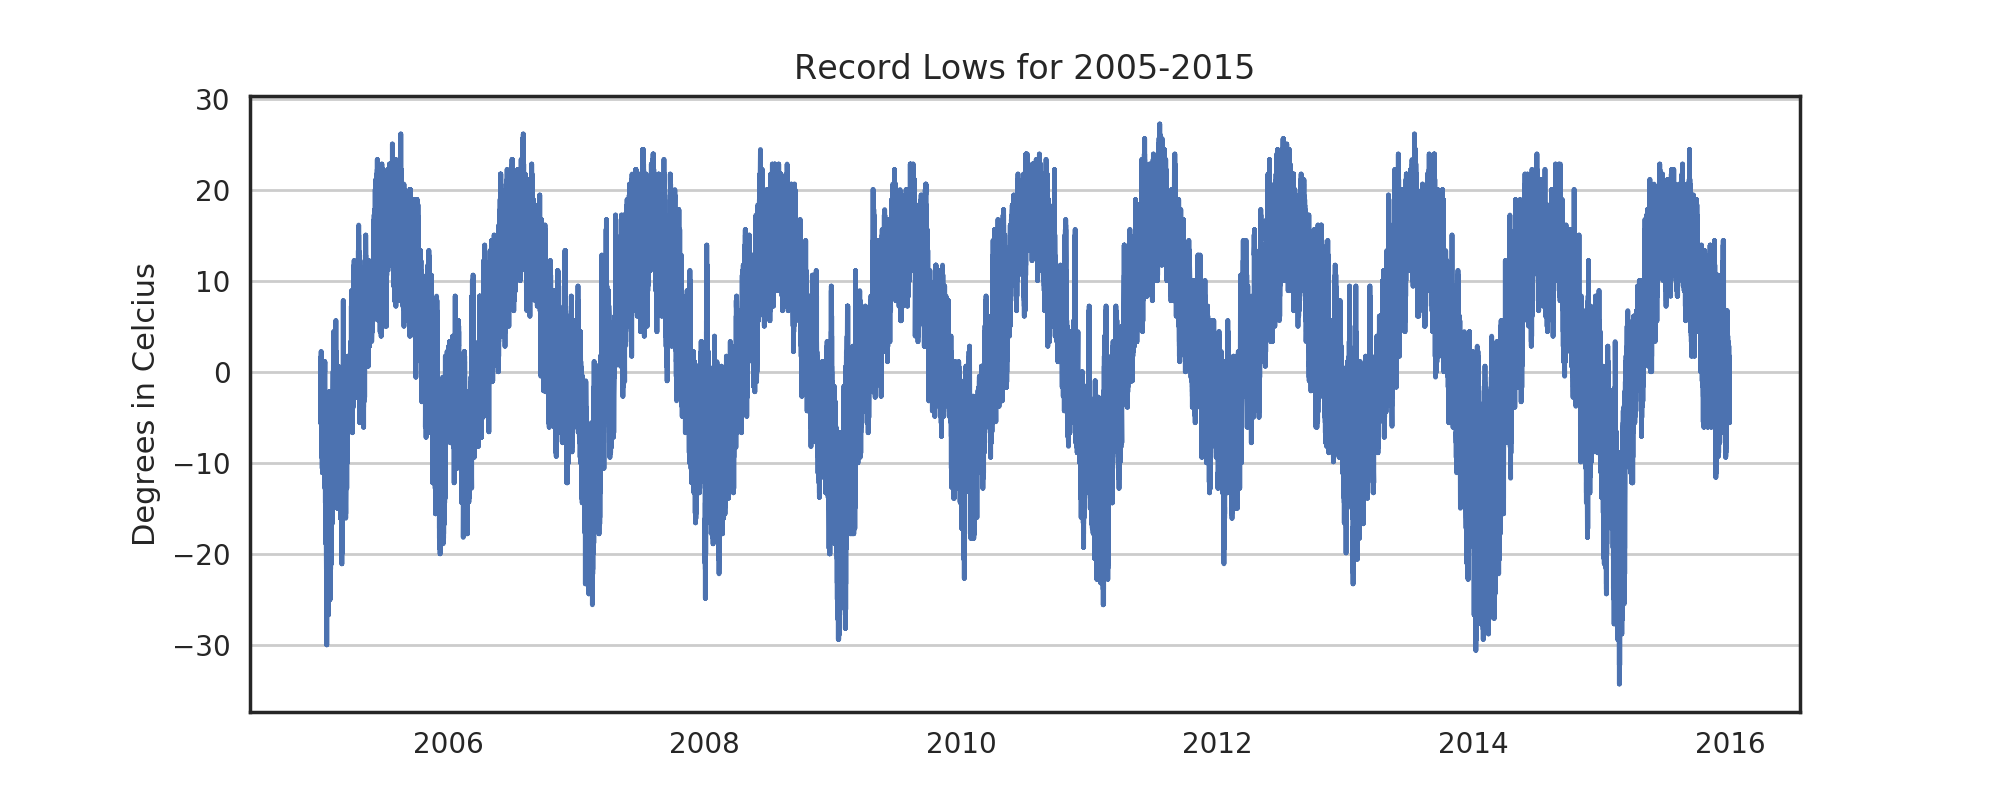

In [17]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
ax.grid(axis='y')
plt.plot(df_tmin['Date'], df_tmin['Data_Value'])
plt.ylabel('Degrees in Celcius')
#plt.xlabel('Total years: 2005-2015 ')
plt.title('Record Lows for 2005-2015');

<IPython.core.display.Javascript object>


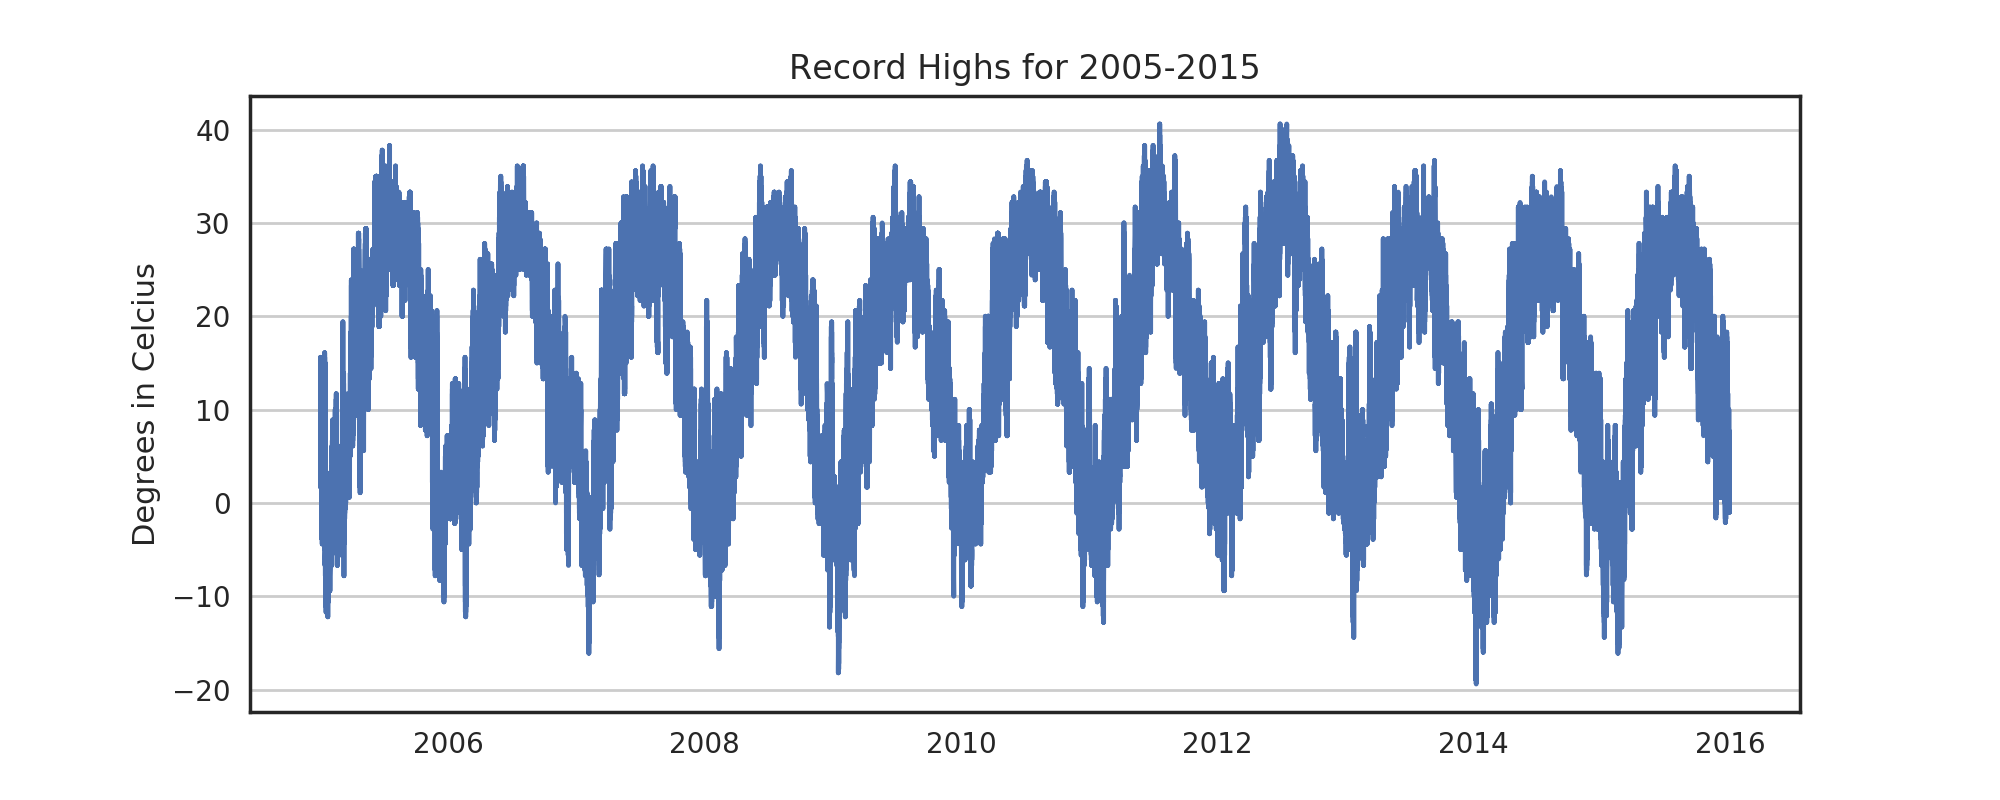

In [18]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
ax.grid(axis='y')
plt.plot(df_tmax['Date'], df_tmax['Data_Value'])
plt.ylabel('Degrees in Celcius')
#plt.xlabel('Total years: 2005-2015 ')
plt.title('Record Highs for 2005-2015');

### Pair down the data a bit more to 2005-2014 and create new df for 2015

In [19]:
df_tmin_2015 = df_tmin[df_tmin['Date'] >= '2015']

In [20]:
df_tmin = df_tmin[df_tmin['Date'] < '2015']

In [21]:
df_tmax_2015 = df_tmax[df_tmax['Date'] >= '2015']

In [22]:
df_tmax = df_tmax[df_tmax['Date'] < '2015']

<IPython.core.display.Javascript object>


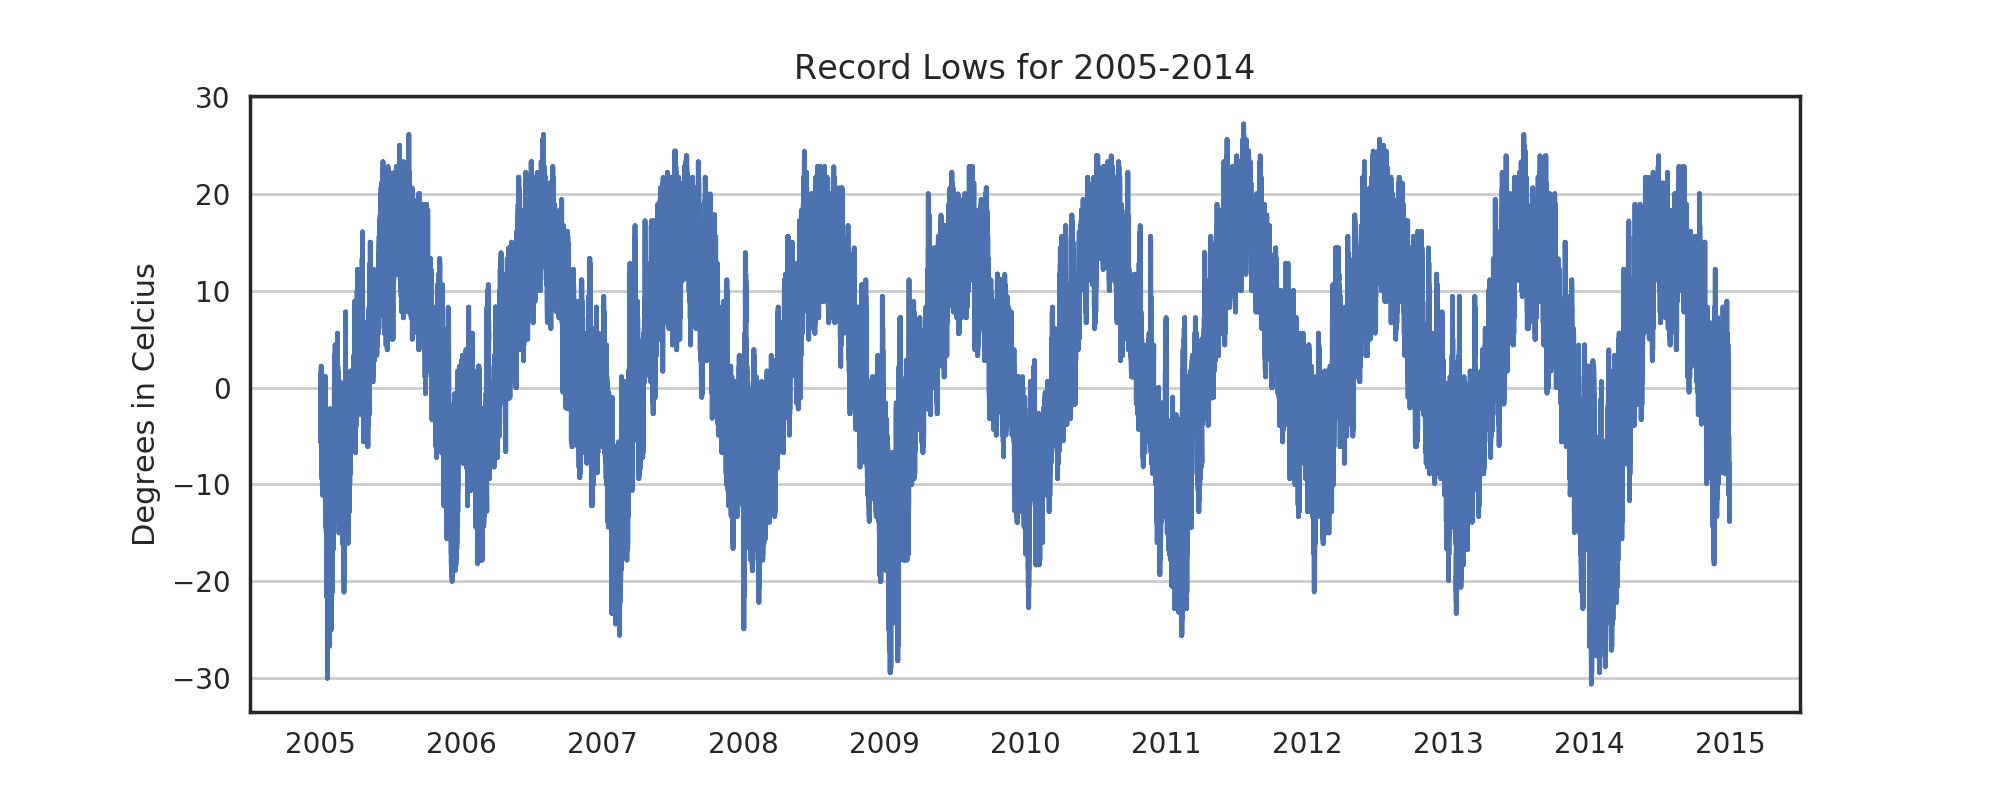

In [23]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
ax.grid(axis='y')
plt.plot(df_tmin['Date'], df_tmin['Data_Value'])
plt.ylabel('Degrees in Celcius')
#plt.xlabel('Total years: 2005-2014 ')
plt.title('Record Lows for 2005-2014');

<IPython.core.display.Javascript object>


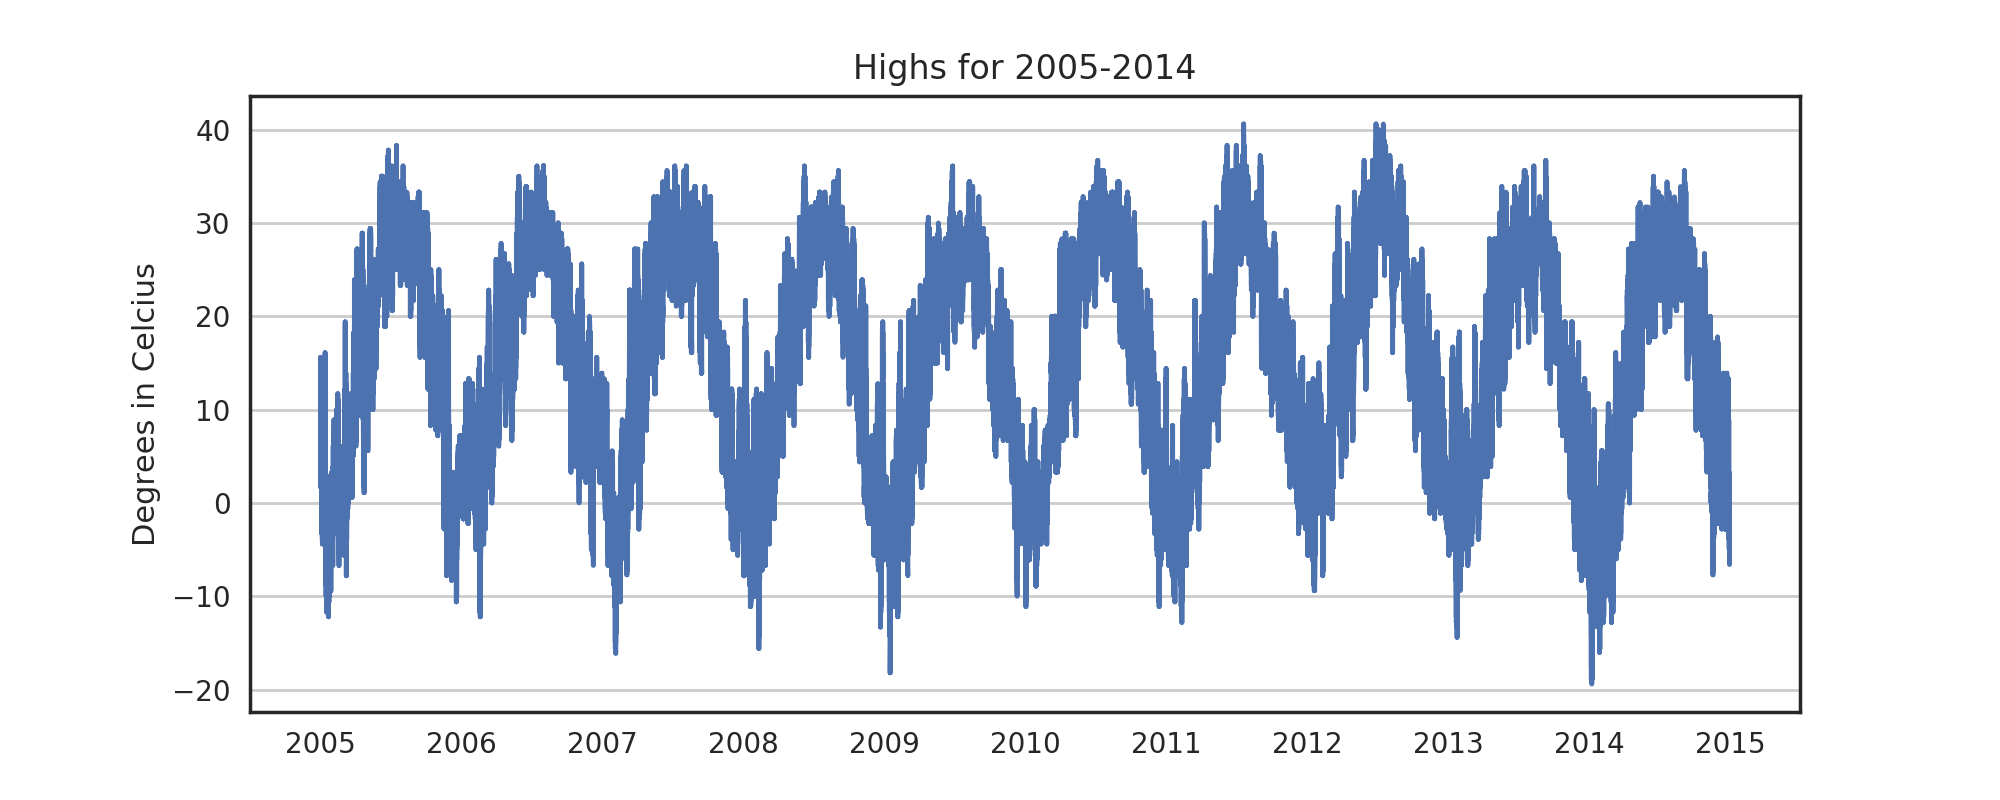

In [24]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
ax.grid(axis='y')
plt.plot(df_tmax['Date'], df_tmax['Data_Value'])
plt.ylabel('Degrees in Celcius')
#plt.xlabel('Total years: 2005-2014 ')
plt.title('Highs for 2005-2014');

<IPython.core.display.Javascript object>


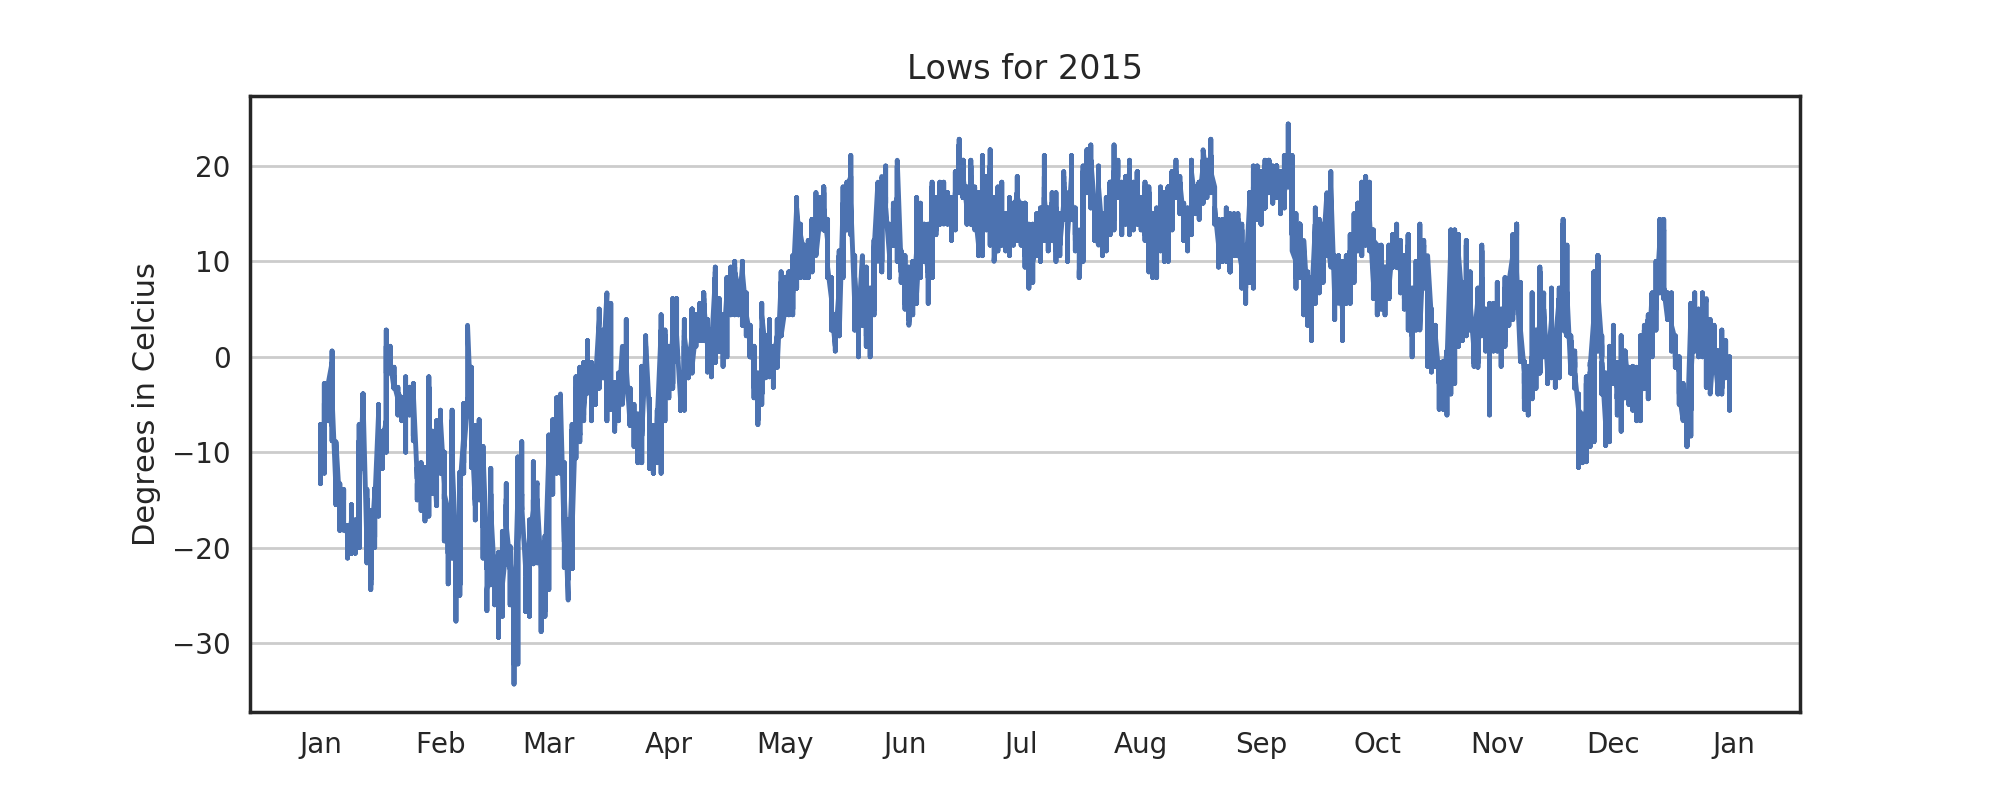

In [25]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
ax.grid(axis='y')
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.plot(df_tmin_2015['Date'], df_tmin_2015['Data_Value'])
plt.ylabel('Degrees in Celcius')
#plt.xlabel('Total years: 2005-2014 ')
plt.title('Lows for 2015');

<IPython.core.display.Javascript object>


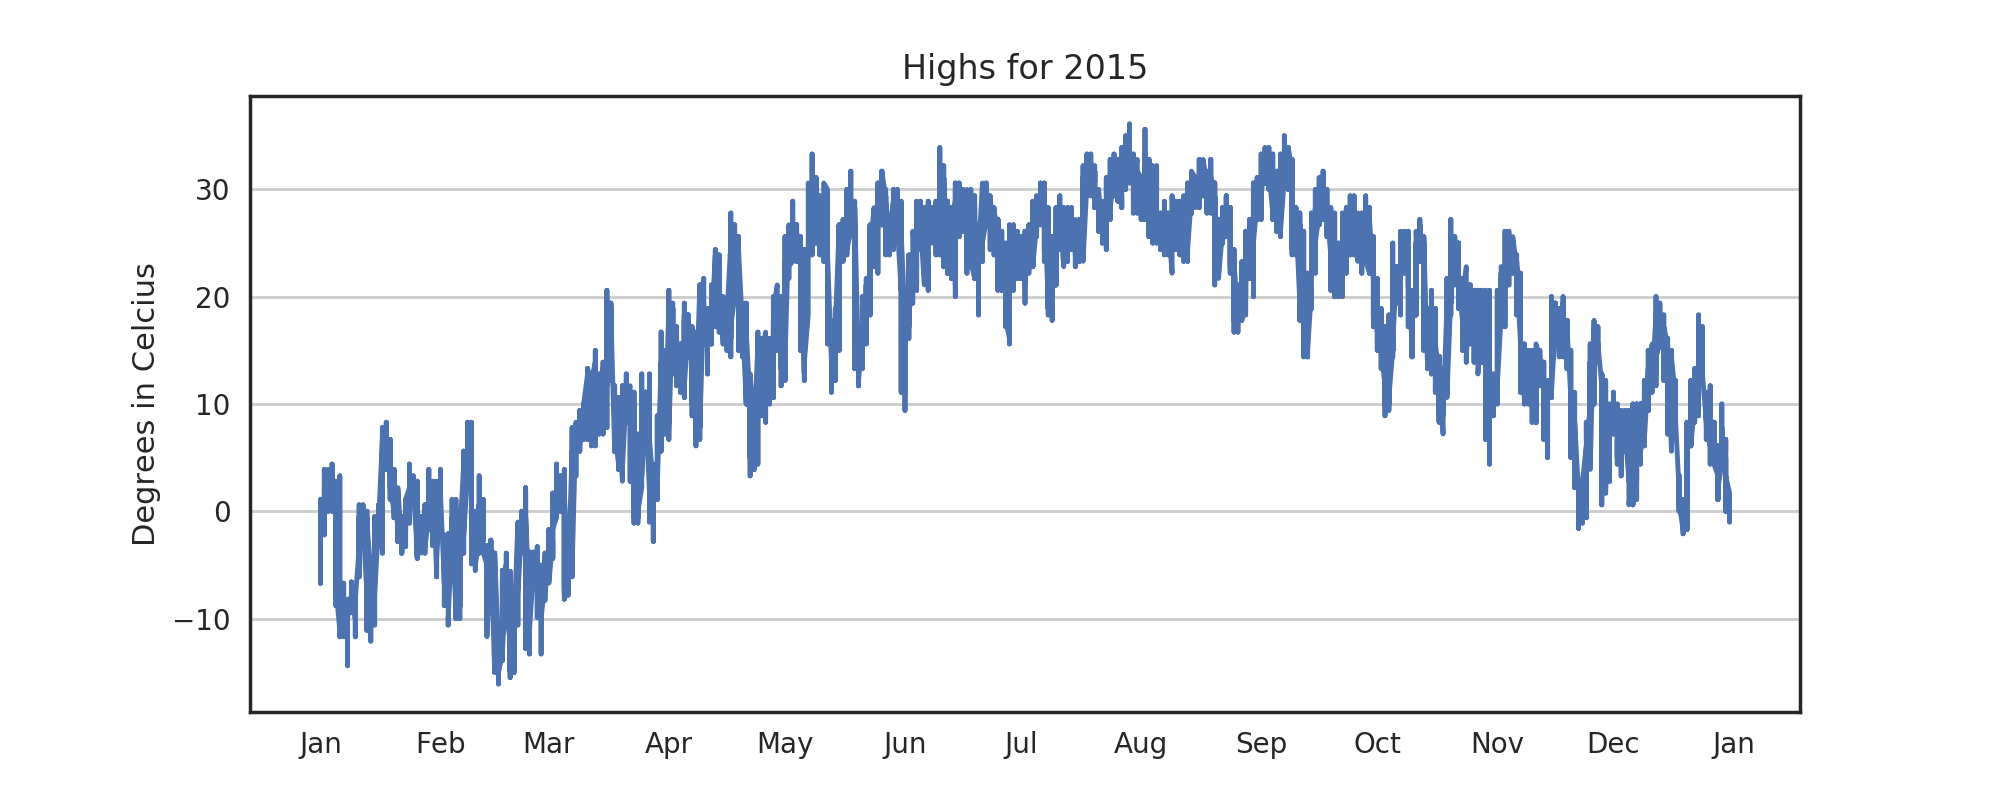

In [26]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
ax.grid(axis='y')
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.plot(df_tmax_2015['Date'], df_tmax_2015['Data_Value'])
plt.ylabel('Degrees in Celcius')
#plt.xlabel('Total years: 2005-2014 ')
plt.title('Highs for 2015');

In [27]:
min_2015 = df_tmin_2015.groupby(by=['Date'])['Data_Value'].min()
max_2015 = df_tmax_2015.groupby(by=['Date'])['Data_Value'].max()

In [28]:
min_2015.shape

(365,)

<IPython.core.display.Javascript object>


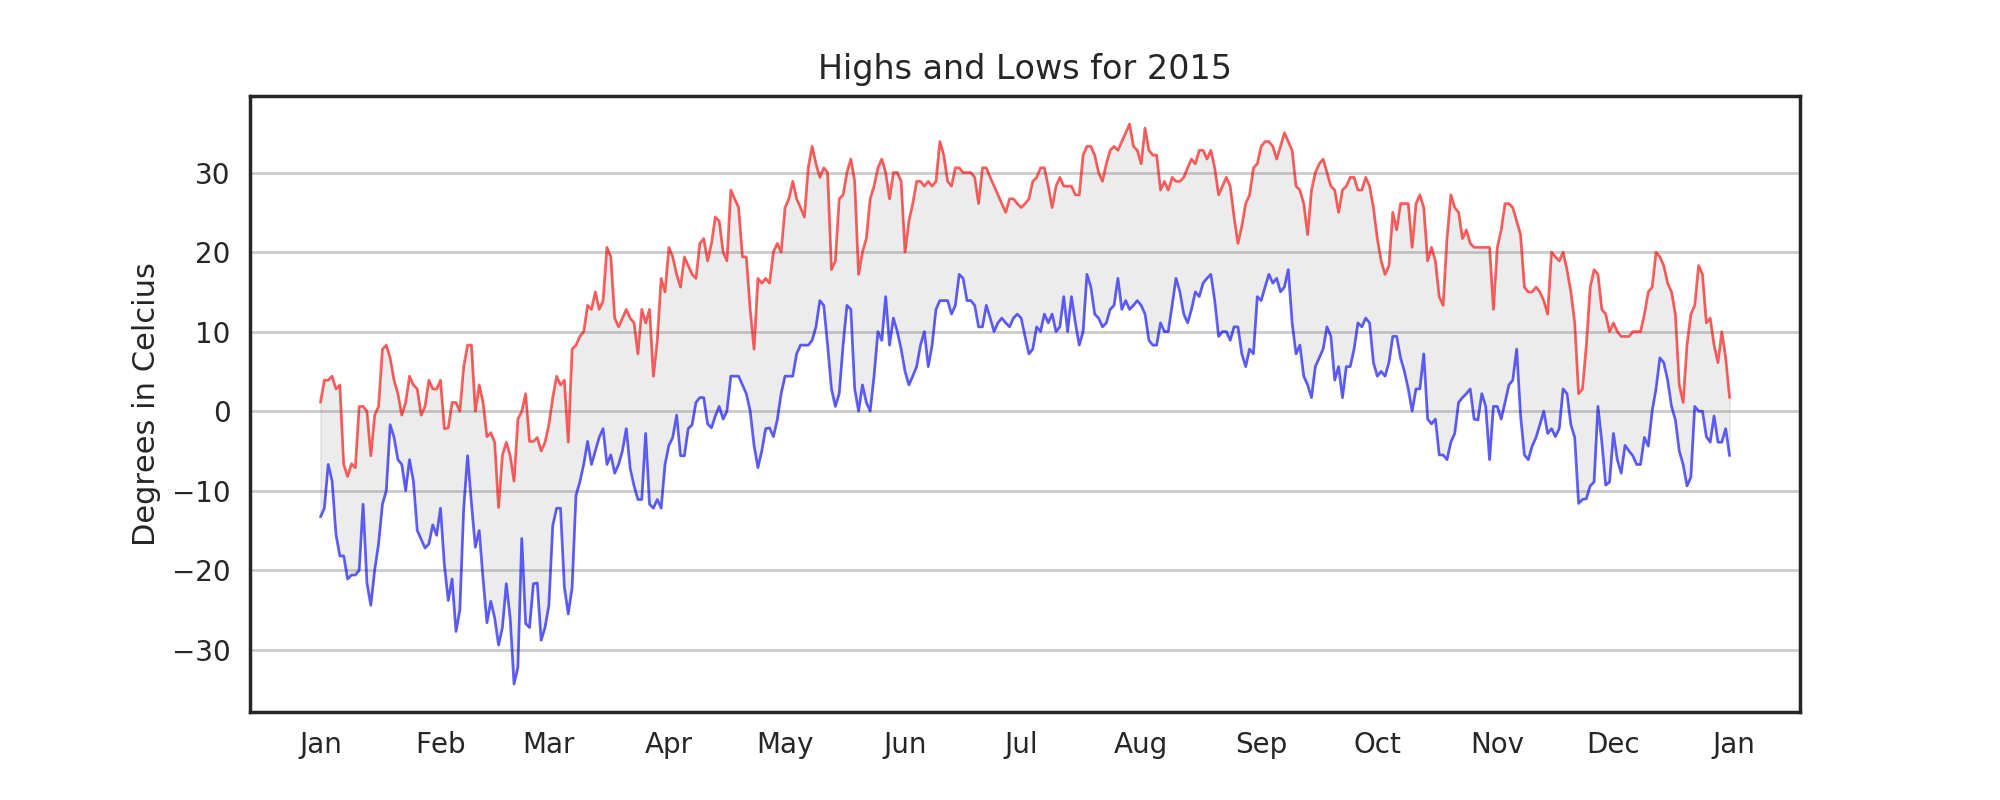

In [29]:
fig = plt.figure(figsize=(10,4))
#plt.axes(frameon=False)
ax = fig.gca()
ax.grid(axis='y')
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.plot(min_2015, color='blue', alpha=0.6, lw=1)
plt.plot(max_2015, color='red', alpha=0.6, lw=1)
plt.ylabel('Degrees in Celcius')
plt.title('Highs and Lows for 2015');
plt.gca().fill_between(min_2015.index,min_2015,max_2015,facecolor='grey', alpha=0.15);

### Note to grader: I tried balancing the "chart junk" vs absolute minimalism. Below is the balance I settled on.

In [30]:
df_tmin['month_day'] = df_tmin['Date'].apply(lambda t: str(t.month)+'-'+str(t.day))
df_tmax['month_day'] = df_tmax['Date'].apply(lambda t: str(t.month)+'-'+str(t.day))
df_tmin = df_tmin[df_tmin['month_day'] != '2-29']
df_tmax = df_tmax[df_tmax['month_day'] != '2-29']
df_tmin['Date'] = df_tmin['Date'].map(lambda x: x.replace(year=2015))
df_tmax['Date'] = df_tmax['Date'].map(lambda x: x.replace(year=2015))
df_tmin.drop(['month_day'], axis=1, inplace=True)
df_tmax.drop(['month_day'], axis=1, inplace=True)
df_grouped_tmin = df_tmin.groupby(by=['Date'])['Data_Value'].min()
df_grouped_tmax = df_tmax.groupby(by=['Date'])['Data_Value'].max()
df_tmin_combined = pd.concat([df_grouped_tmin, min_2015], axis=1, keys=['tenyear', '2015'])
df_min_record = df_tmin_combined[df_tmin_combined['2015'] < df_tmin_combined['tenyear']]
df_tmax_combined = pd.concat([df_grouped_tmax, max_2015], axis=1, keys=['tenyear', '2015'])
df_max_record = df_tmax_combined[df_tmax_combined['2015'] > df_tmax_combined['tenyear']]

<IPython.core.display.Javascript object>


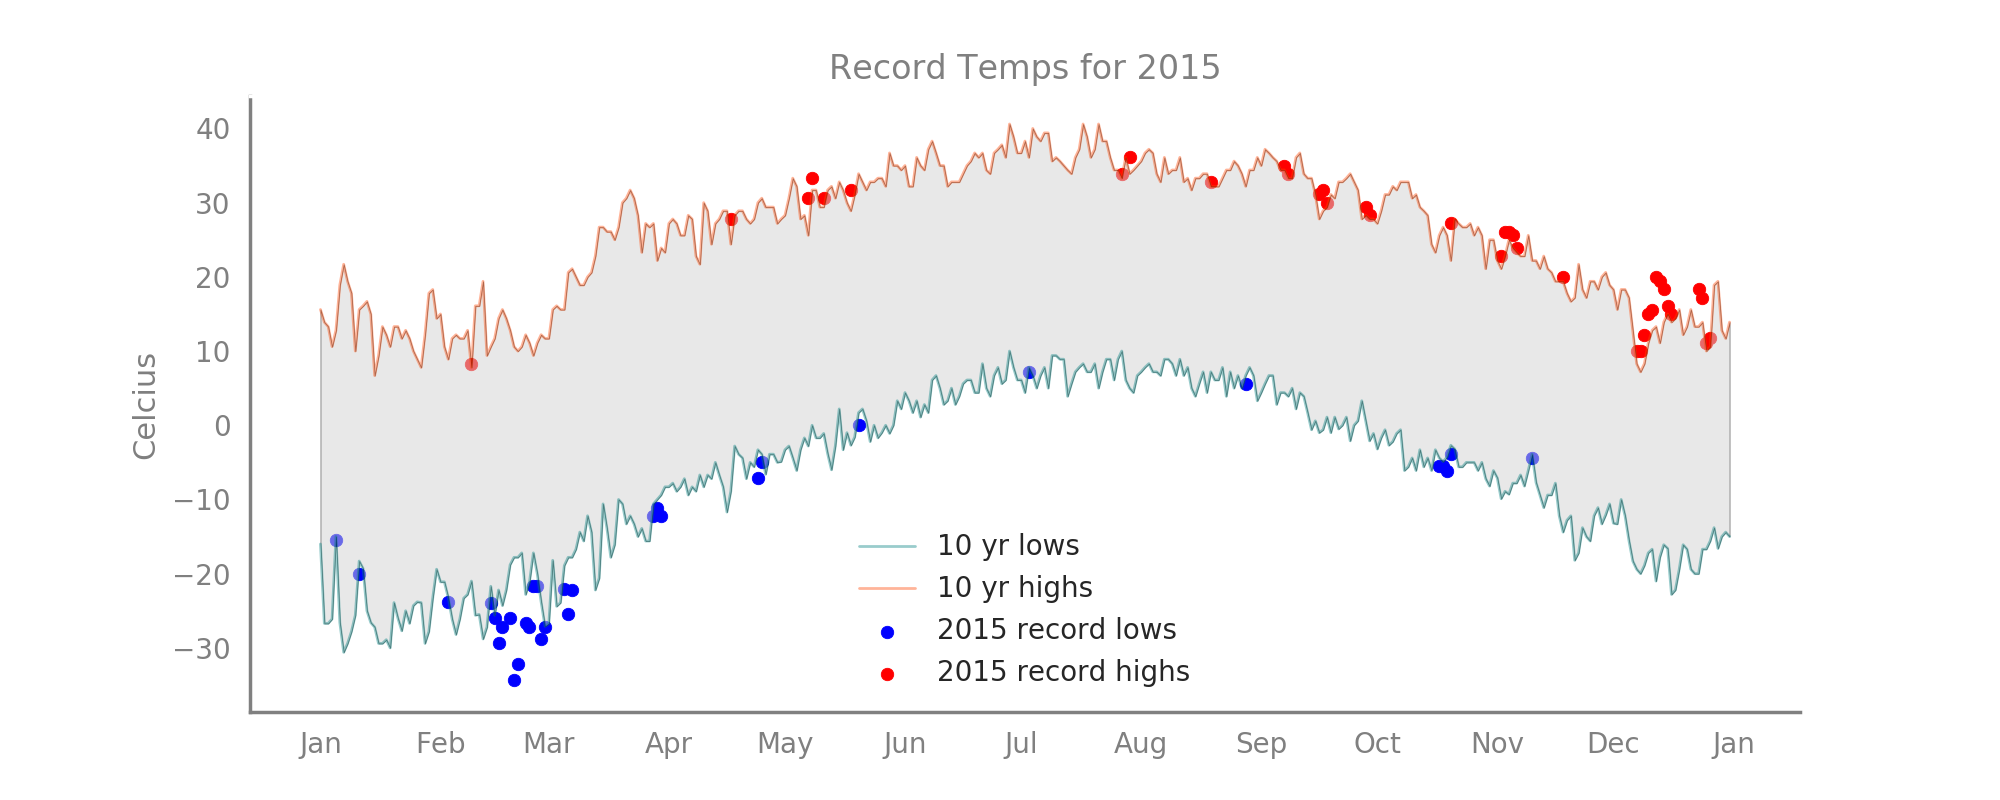

In [31]:
fig = plt.figure(figsize=(10,4))
plt.axes(frameon=True)
ax = fig.gca()
ax.grid(axis='none')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('grey')
ax.spines['right'].set_color('white')
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.plot(df_grouped_tmin, color='teal', alpha=0.4, lw=1, label="10 yr lows")
plt.plot(df_grouped_tmax, color='orangered', alpha=0.4, lw=1, label="10 yr highs")
plt.scatter(x=df_min_record.index, y=df_min_record['2015'], c='b', s=20, label="2015 record lows")
plt.scatter(x=df_max_record.index, y=df_max_record['2015'], c='r', s=20, label="2015 record highs")
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.ylabel('Celcius', color='grey')
plt.title('Record Temps for 2015', color='grey');
plt.gca().fill_between(df_grouped_tmin.index,
                       df_grouped_tmin,
                       df_grouped_tmax,
                       facecolor='lightgray', alpha=0.5);
ax.legend(loc='best');